In [1]:
from env import MultiTradingEnv,State,Action
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta 

In [2]:
stocks=['63MOONS.csv','3IINFOTECH.csv','BIOCON.csv','ABB.csv']
dataframes=[]
# stocks=['63MOONS.csv']
path='/home/siddharth/Desktop/MultiTrading/Datasets/SCRIP/'
timesteps=500
for name in stocks:
    df=pd.read_csv(path+name)
    df=df[:timesteps]
    df=df[['Open','Close','High','Low','Volume']]
    df.reset_index(inplace=True,drop=True)
    dataframes.append(df)


In [3]:

def preprocess(data):    
    long_sma_window = 50
    short_sma_window = 20
    data['feature_Long_SMA'] = data['Close'].rolling(window=long_sma_window, min_periods=1).mean()
    data['feature_Short_SMA'] = data['Close'].rolling(window=short_sma_window, min_periods=1).mean()
    data['feature_RSI'] = ta.momentum.rsi(close=data['Close'], window=14)
    data["feature_Close"] = data["Close"].pct_change()
    data["feature_Open"] = data["Open"]/data["Close"]
    data["feature_High"] = data["High"]/data["Close"]
    data["feature_low"] = data["Low"]/data["Close"]
    # data["feature_Volume"] = data["Volume"] / data["Volume"].rolling(7*24).max()
    data.dropna(inplace=True)
    data.reset_index(inplace=True,drop=True)


In [4]:
norm_dataframes=[]
for i in range(len(dataframes)):
    df=dataframes[i]
    preprocess(df)
    dataframes[i]=df
    df = (df - df.min()) / (df.max() - df.min())
    norm_dataframes.append(df)

In [5]:
dataframes[0]

,Open,Close,High,Low,Volume,feature_Long_SMA,feature_Short_SMA,feature_RSI,feature_Close,feature_Open,feature_High,feature_low
0,1250.00,1210.45,1270.00,1201.70,10715,1259.589286,1259.589286,34.886775,-0.028102,1.032674,1.049197,0.992771
1,1210.00,1215.85,1239.95,1210.00,2209,1256.673333,1256.673333,36.792563,0.004461,0.995189,1.019822,0.995189
2,1237.00,1246.05,1253.90,1220.00,10249,1256.009375,1256.009375,46.264981,0.024839,0.992737,1.006300,0.979094
3,1258.00,1265.45,1272.00,1250.00,106621,1256.564706,1256.564706,51.312623,0.015569,0.994113,1.005176,0.987791
4,1265.05,1273.40,1276.00,1260.00,29074,1257.500000,1257.500000,53.250637,0.006282,0.993443,1.002042,0.989477
...,...,...,...,...,...,...,...,...,...,...,...,...
482,2251.30,2197.80,2303.70,2180.00,47692,2373.587000,2221.137500,44.820406,-0.022679,1.024343,1.048185,0.991901
483,2198.00,2154.50,2249.80,2100.00,48382,2369.088000,2208.657500,42.226560,-0.019702,1.020190,1.044233,0.974704
484,2102.00,2078.60,2112.00,2025.00,113539,2364.344000,2193.755000,38.067793,-0.035229,1.011258,1.016069,0.974213
485,2081.00,2012.25,2106.00,1991.05,96546,2355.734000,2176.512500,34.837719,-0.031921,1.034166,1.046590,0.989465


In [6]:
norm_dataframes[0]

,Open,Close,High,Low,Volume,feature_Long_SMA,feature_Short_SMA,feature_RSI,feature_Close,feature_Open,feature_High,feature_low
0,0.091985,0.070392,0.076110,0.109913,0.016652,0.050027,0.061563,0.260476,0.351328,0.637708,0.378476,0.960291
1,0.071407,0.073176,0.060466,0.114124,0.000000,0.048117,0.059877,0.285265,0.491336,0.466701,0.148465,0.974769
2,0.085297,0.088750,0.067729,0.119197,0.015740,0.047682,0.059494,0.408475,0.578950,0.455517,0.042589,0.878374
3,0.096100,0.098755,0.077151,0.134417,0.204404,0.048046,0.059815,0.474131,0.539096,0.461793,0.033789,0.930462
4,0.099727,0.102854,0.079234,0.139491,0.052593,0.048659,0.060355,0.499339,0.499167,0.458737,0.009247,0.940561
...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.607110,0.579558,0.614243,0.606235,0.089041,0.779627,0.617368,0.389685,0.374647,0.599701,0.370552,0.955079
483,0.579689,0.557229,0.586184,0.565649,0.090392,0.776680,0.610154,0.355946,0.387448,0.580758,0.339611,0.852082
484,0.530301,0.518088,0.514446,0.527599,0.217948,0.773573,0.601540,0.301852,0.320689,0.540008,0.119079,0.849143
485,0.519498,0.483872,0.511323,0.510375,0.184681,0.767934,0.591573,0.259838,0.334912,0.644514,0.358064,0.940486


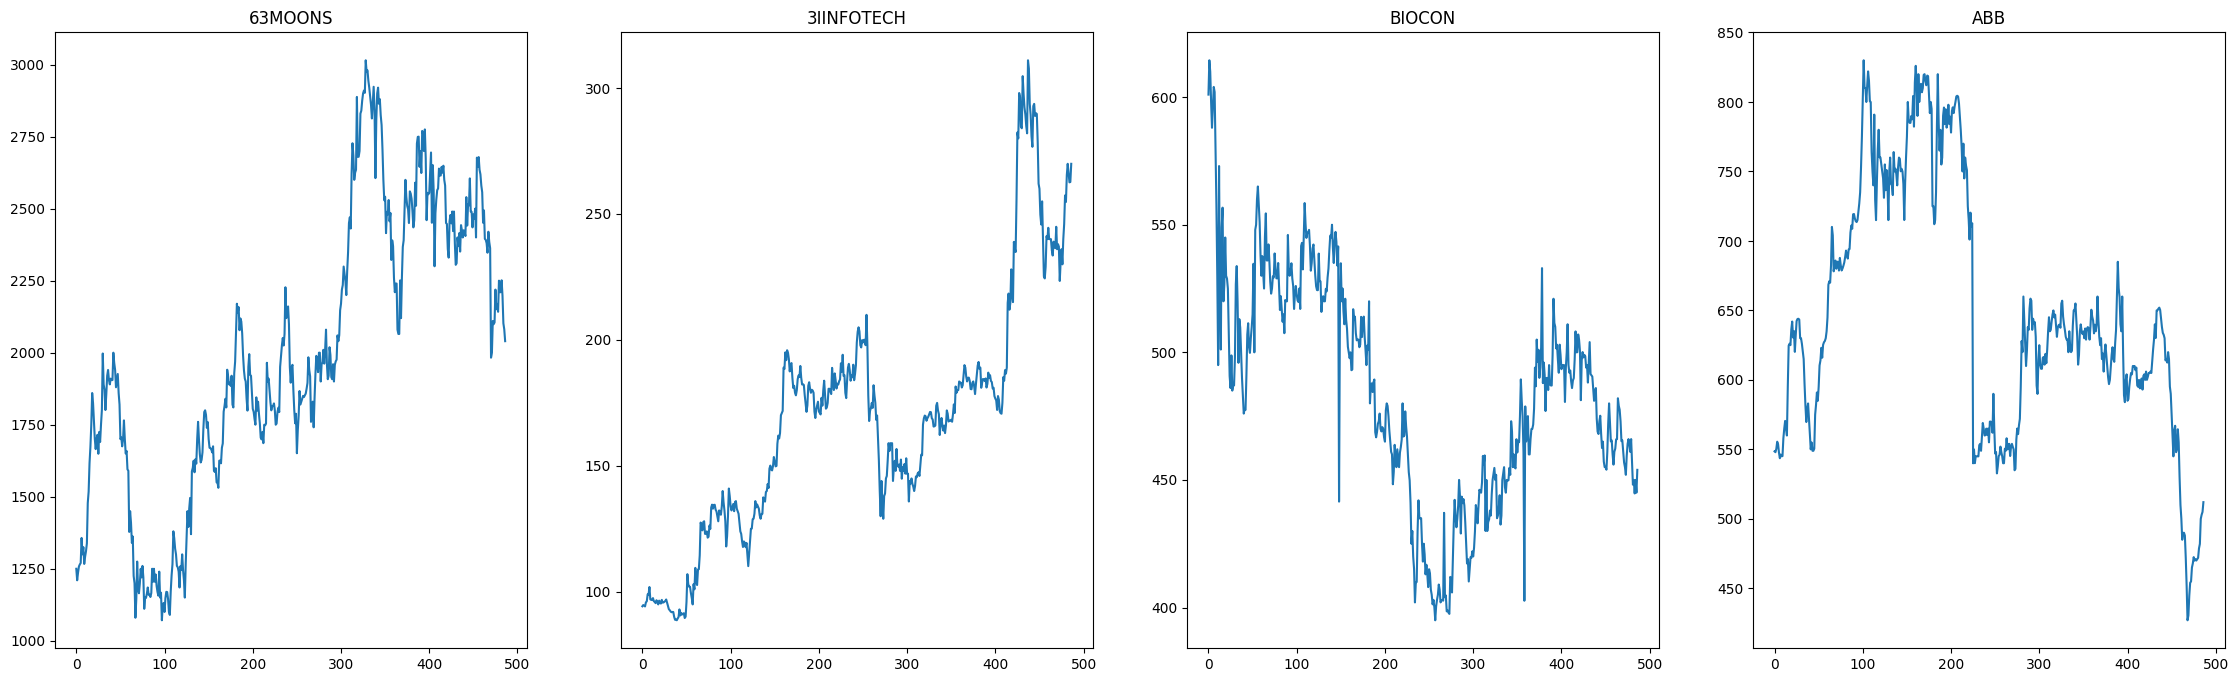

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def create_subplots(n):
    fig, axes = plt.subplots(1, n, figsize=(7*n, 2*n))
    for i in range(n):
        data = dataframes[i]['Open']
        axes[i].plot(data)
        axes[i].set_title(stocks[i][:-4])
    plt.show()
n = len(dataframes)
create_subplots(n)

In [8]:
import itertools
num_stocks=len(dataframes)
boxes=2*(num_stocks+1)
rng = list(range(boxes + 1)) * num_stocks
wt_combs=[]
lol=set(i for i in itertools.permutations(rng, num_stocks) if sum(i) == boxes)
for i in lol:
    wt_combs.append(i)
wt_combs=np.array(wt_combs)
wt_combs_norm=wt_combs/boxes
print(len(wt_combs_norm))
wt_combs_norm

286


array([[0. , 0.1, 0.4, 0.5],
       [0. , 0.1, 0.5, 0.4],
       [0. , 0.4, 0.3, 0.3],
       ...,
       [0.2, 0.2, 0.1, 0.5],
       [0.2, 0.2, 0.2, 0.4],
       [0.5, 0. , 0.2, 0.3]])

In [9]:
from env import MultiTradingEnv;
LOOKBACK=1
step=0.1
positions=np.arange(0,1,step)
positions=np.append(positions,1)
print(positions)
Env = MultiTradingEnv(dataframes_array=dataframes,
                      norm_dataframes=norm_dataframes,
                       total_timesteps=len(dataframes[0])-LOOKBACK-1,
                       initial_cap=100000.0,
                       features=dataframes[0].columns,
                       lookback=LOOKBACK,
                       positions=positions,
                       wt_combs=wt_combs_norm,
                       )
                       

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [10]:
from env import State,Action
features=dataframes[0].columns
state = State(dataframes_array=norm_dataframes,features=features,lookback=LOOKBACK,time=100)
state.print()
holdings=[]
for i in range(Env.num_stocks):
    holdings.append(np.random.choice(Env.positions))
act=Action(weights=np.ones(shape=(Env.num_stocks))/Env.num_stocks,holdings=holdings)
act.print()

(4, 1, 12)
[[[0.03086737 0.01168038 0.01551356 0.04309776 0.02823941 0.06985508
   0.01282652 0.25566    0.30376015 0.63259065 0.40026186 0.858305  ]]

 [[0.22177238 0.2039429  0.20893926 0.20469331 0.11091734 0.15963928
   0.20016012 0.53391449 0.32285049 0.67839545 0.29103299 0.91176268]]

 [[0.59694691 0.5728552  0.56030702 0.61361607 0.06559968 0.58016023
   0.5607905  0.51476049 0.43930218 0.68692427 0.05513773 0.99326966]]

 [[0.86350664 0.93507491 0.91296296 0.89243181 0.11837802 0.59621383
   0.73020857 0.97612482 0.91185319 0.12687228 0.15179137 0.43553528]]]
(4,)
[0.  1.  0.9 0.4]


In [11]:
import pandas as pd
import numpy as np
import ta
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
import gymnasium as gym
import math
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [13]:
Transition = namedtuple('Transition',
                        ('state', 'action','weight','next_state', 'reward'))

class ReplayMemory(object):
    
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class DQN(nn.Module):
    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 1024)
        self.layer2 = nn.Linear(1024, 512)
        self.layer3 = nn.Linear(512, 256)
        self.layer4 = nn.Linear(256, n_actions)

    def forward(self, x):
        x = F.selu(self.layer1(x))
        x = F.selu(self.layer2(x))
        x = F.selu(self.layer3(x))
        # Reshape the output to have shape (batch_size, 3, 10)
        x = self.layer4(x).view(-1, len(Env.positions),Env.num_stocks)
        return x
        
class DQNW(nn.Module):
    def __init__(self, n_observations, n_actions):
        super(DQNW, self).__init__()
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.Flatten()
        )
        self.layer1 = nn.Linear(n_observations, 1024)
        self.layer2 = nn.Linear(1024, 512)
        self.layer3 = nn.Linear(512, 256)
        self.layer4 = nn.Linear(256, n_actions)

    def forward(self, x):
        x = self.cnn_layers(x)
        x = F.selu(self.layer1(x))
        x = F.selu(self.layer2(x))
        x = F.selu(self.layer3(x))
        x = self.layer4(x).view(-1, len(wt_combs_norm))
        return x

In [15]:
BATCH_SIZE = 1
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(Env.action_space)
n_actions = Env.num_stocks*len(Env.positions)
n_weights=len(wt_combs_norm)
print(n_actions)
print(n_weights)
# Get the number of state observations
state = Env.reset()
n_observations = len(state.features.flatten())
print(n_observations)
policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
policy_net_wt = DQNW(n_observations, n_weights).to(device)
target_net_wt = DQNW(n_observations, n_weights).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net_wt.load_state_dict(policy_net_wt.state_dict())
optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)
optimizer2 = optim.AdamW(policy_net_wt.parameters(), lr=LR, amsgrad=True)

memory = ReplayMemory(1)



steps_done2 = 0 
steps_done = 0

Discrete(4)
44
286
48


In [17]:
def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    # eps_threshold=0
    if sample > eps_threshold:

        with torch.no_grad():
        # t.max(1) will return the largest column value of each row.
        # second column on max result is index of where max element was
        # found, so we pick action with the larger expected reward.
            output=policy_net(state).max(1)
            return output.indices
    else:
        return torch.randint(0, len(Env.positions), (Env.num_stocks,)).unsqueeze(0)
def select_weight(state):
    global steps_done2
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done2 / EPS_DECAY)
    steps_done2 += 1
    if sample > eps_threshold:
        with torch.no_grad():
        # t.max(1) will return the largest column value of each row.
        # second column on max result is index of where max element was
        # found, so we pick action with the larger expected reward.
            output=policy_net_wt(state).max(1)
            return output.indices
    else:
        return torch.randint(0, len(wt_combs_norm),(1,)).unsqueeze(0)

In [18]:
def plot_durations(history,show_result=False,):
    plt.figure(1)
    durations_t = torch.tensor(history, dtype=torch.float)
    if show_result:
        plt.title('Result')
    else:
        plt.clf()
        plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Maximum Net Worth')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 5:
        means = durations_t.unfold(0, 5, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(4), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        if not show_result:
            display.display(plt.gcf())
            display.clear_output(wait=True)
        else:
            display.display(plt.gcf())

In [19]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    batch = Transition(*zip(*transitions))
    # print(f"Batch: {batch}")
    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = []
    non_final_next_states = []
    
    for i in range(len(batch.next_state)):
        if batch.next_state[i] is not None:
            non_final_mask.append(batch.next_state[i].size(1) != 0)
            non_final_next_states.append(batch.next_state[i])
    non_final_mask = torch.tensor(non_final_mask, device=device, dtype=torch.bool).unsqueeze(1)
    if non_final_next_states:
        non_final_next_states = torch.cat(non_final_next_states)
    else:
        non_final_next_states = torch.tensor([], device=device)  # Empty tensor
    weight_batch = torch.cat(batch.weight)
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)
    # print(reward_batch)
    state_action_values = policy_net(state_batch.view(-1)).gather(1, action_batch.unsqueeze(-1))
    # print(policy_net_wt(state_batch.view(-1)))
    # print(weight_batch)
    weight_state_action_values = policy_net_wt(state_batch)
    # print(weight_state_action_values.shape)
    weight_next_state_values= torch.zeros(BATCH_SIZE, device=device)
    next_state_values = torch.zeros(BATCH_SIZE, device=device)

    if non_final_next_states.numel() > 0:  # Check if non_final_next_states is non-empty
        with torch.no_grad():
            next_state_values = target_net(non_final_next_states.view(-1)).max(1).values
            weight_next_state_values=target_net_wt(non_final_next_states).max(1).values

    expected_state_action_values = (next_state_values * GAMMA) + reward_batch
    weight_expected_state_action_values = (weight_next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))
    loss_wt=criterion(weight_state_action_values, weight_expected_state_action_values.unsqueeze(1))
    # Optimize the model
    optimizer.zero_grad()
    optimizer2.zero_grad()
    loss.backward()
    loss_wt.backward()
    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    torch.nn.utils.clip_grad_value_(policy_net_wt.parameters(), 100)
    optimizer.step()
    optimizer2.zero_grad()


In [20]:
num_episodes = 5
for i_episode in range(num_episodes):
    state = Env.reset()
    state = torch.tensor(state.features, dtype=torch.float32, device=device).unsqueeze(0)
    # print(state.shape)
    # state = state.view(-1)
    for t in count():
        Action = select_action(state.view(-1)).to(device)
        weight = select_weight(state).to(device)
        # print(Action,weight)
        observation, reward, terminated  = Env.step(Action,weight)
        reward = torch.tensor([reward], device=device)

        if terminated:
            next_state = None
        else:
            next_state = torch.tensor(observation.features, dtype=torch.float32, device=device).unsqueeze(0)
        memory.push(state, Action, weight, next_state, reward)
        state = next_state
        
        optimize_model()

        # Soft update of the target network's weights
        # θ′ ← τ θ + (1 −τ )θ′
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
        target_net.load_state_dict(target_net_state_dict)

        target_net_state_dict_wt = target_net_wt.state_dict()
        policy_net_state_dict_wt = policy_net_wt.state_dict()
        for key in policy_net_state_dict_wt:
            target_net_state_dict_wt[key] = policy_net_state_dict_wt[key]*TAU + target_net_state_dict_wt[key]*(1-TAU)
        target_net_wt.load_state_dict(target_net_state_dict_wt)
        if terminated:
            break
        Env.render(episode_num=i_episode)
    plot_durations(history=Env.history)
    Env.render_logs()        # print(Action)
print('Complete')


Complete


<Figure size 640x480 with 0 Axes>

In [23]:
print(Env.history_array[4])

[[77091.8, array([0. , 0.2, 0.3, 0.1]), array([0., 0., 0., 5.]), 100000.0], [64457.3, array([0.4, 0. , 0.4, 0.2]), array([0., 0., 0., 5.]), 99683.6], [64457.3, array([0.4, 0. , 0.4, 0.2]), array([0., 0., 0., 5.]), 100084.6], [66418.3, array([0.4, 0. , 0.4, 0.2]), array([0., 0., 0., 5.]), 100987.3], [49315.49999999999, array([0.8, 0.8, 0.4, 0.2]), array([0., 0., 0., 5.]), 100610.3], [48461.19999999999, array([0.8, 0.8, 0.4, 0.2]), array([0., 0., 0., 5.]), 100149.4], [65323.19999999998, array([0.5, 0.8, 0.4, 0.2]), array([0., 0., 0., 5.]), 98003.19999999998], [59571.59999999997, array([0.6, 0.5, 0.2, 0.3]), array([0., 0., 0., 5.]), 97026.59999999998], [53131.09999999998, array([0.5, 0.8, 0.4, 0.2]), array([0., 0., 0., 5.]), 96778.09999999998], [55703.59999999998, array([0.5, 0.8, 0.4, 0.2]), array([0., 0., 0., 5.]), 101239.09999999998], [55187.049999999974, array([0.5, 0.8, 0.4, 0.2]), array([0., 0., 0., 5.]), 99650.64999999998], [10245.349999999977, array([0.9, 0.4, 0. , 0.9]), array([0

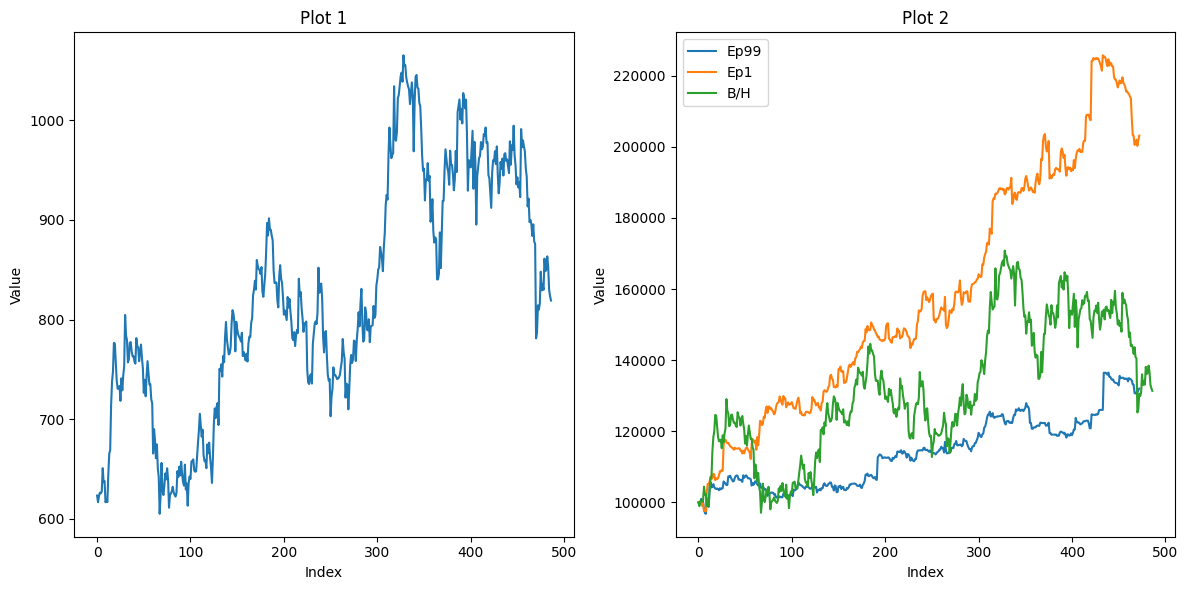

In [25]:
import matplotlib.pyplot as plt
arr = [Env.history_array[4][i][3] for i in range(len(Env.history_array[0]))]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
tmp=np.zeros(shape=len(Env.dataframes_array[0]))
cnt=0
wts=np.ones(num_stocks)/num_stocks
for i in Env.dataframes_array:
    ar=np.array(i['Open'])*wts[cnt]
    tmp+=ar
    cnt+=1

# arr = np.array(arr)/np.max(arr)
axes[0].plot(tmp)
axes[0].set_title('Plot 1')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')
arr2 = [Env.history_array[0][i][3] for i in range(len(Env.history_array[0]))]
arr3 = tmp*(Env.initial_cap/tmp[0])
# arr = np.array(arr)/np.max(arr)
axes[1].plot(arr,label='Ep99')
axes[1].plot(arr2,label='Ep1')
axes[1].plot(arr3,label='B/H')
axes[1].legend()
axes[1].set_title('Plot 2')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Value')
plt.tight_layout()
plt.show()
